<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/Bivariatecorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [4]:
df = pd.read_excel("/content/drive/MyDrive/BrandEquity_student_copy.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BL      999 non-null    float64
 1   BAS     999 non-null    float64
 2   BAW     999 non-null    float64
 3   PQ      999 non-null    float64
 4   OBE     999 non-null    float64
dtypes: float64(5)
memory usage: 39.1 KB


In [6]:
df.head(5)

,BL,BAS,BAW,PQ,OBE
0,5.6,6.00,4.0,6.000000,3.000000
1,5.0,7.00,5.0,7.000000,6.333333
2,5.8,5.25,6.0,6.000000,6.000000
3,3.0,5.50,2.0,5.333333,3.666667
4,7.0,6.50,7.0,5.333333,5.000000


To solve for correlation


In [7]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr 

Create a dataframe with 2 variables


In [8]:
data = {'X': [1.2, 2.1, 3.5, 4.7, 5.3], 'Y': [5.6, 4.1, 3.2, 2.8, 1.4]}
df = pd.DataFrame(data)

<AxesSubplot:xlabel='X', ylabel='Y'>

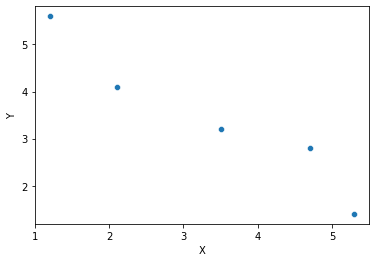

In [9]:
sns.scatterplot(x='X', y='Y', data=df)

compute pearson correlation coefficient and print out the correlation and p-value


In [10]:
pearson_corr, pearson_p = pearsonr(df['X'], df['Y'])
print('Pearson correlation coefficient:', pearson_corr)
print('Pearson correlation p-value:', pearson_p)

Pearson correlation coefficient: -0.9643431782040317
Pearson correlation p-value: 0.00803917065693209


Correlation between 2 ordinal variables


In [11]:
from scipy.stats import spearmanr, kendalltau

create a dataframe with 2 variables


In [12]:
data = {'X': [1, 2, 3, 4, 5], 'Y': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)

<AxesSubplot:xlabel='X', ylabel='Y'>

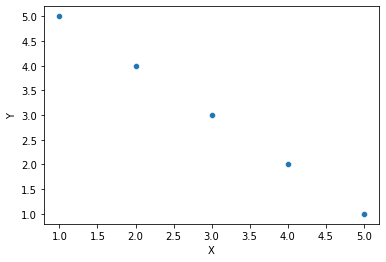

In [13]:
sns.scatterplot(x='X', y='Y', data=df)

compute the spearman correlation coefficient and print out the correlation and p-value


In [14]:
spearman_corr, spearman_p = spearmanr(df['X'], df['Y'])
print('Spearman correlation coefficient:', spearman_corr)
print('Spearman correlation p-value:', spearman_p)

Spearman correlation coefficient: -0.9999999999999999
Spearman correlation p-value: 1.4042654220543672e-24


compute the kendall correlation coefficient and print out the correlation and p-value


In [15]:
kendall_corr, kendall_p = kendalltau(df['X'], df['Y'])
print('Kendall correlation coefficient:' , kendall_corr)
print('kendall correlation p-value:' , kendall_p)

Kendall correlation coefficient: -0.9999999999999999
kendall correlation p-value: 0.016666666666666666


Correlation between one continuous variable and one categorical variable (binary)


In [16]:
from scipy.stats import pointbiserialr

create a dataframe with a continuous and dichotom
ous categorical variable

In [17]:
df = pd.DataFrame({
    'Continuous_Var': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Categorical_Var': [0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
})

compute the point bi-serial correlation coefficient and p-value


In [18]:
corr, pval = pointbiserialr(df['Continuous_Var'], df['Categorical_Var'])

print('Point-biserial correlation coefficient:', corr)
print('P-value:', pval)

Point-biserial correlation coefficient: 0.10444659357341873
P-value: 0.7739992800763525


Association Analysis
Correlation between two categorical variables


In [19]:
import numpy as np
from scipy.stats import chi2_contingency

create a dataframe with 2 categorical variables


In [20]:
data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Male','Male', 'Female', 'Male'], 
        'Smoker': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']}
df = pd.DataFrame(data)

Create a contigency table


In [21]:
contingency_table = pd.crosstab(df['Gender'], df['Smoker'])
contingency_table

Smoker,No,Yes
Gender,,
Female,3,0
Male,1,4


Perform a chi-squared test


In [22]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print results

In [23]:
print('Chi-squared statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-squared statistic: 2.1333333333333333
P-value: 0.14412703481601116
Degrees of freedom: 1
Expected frequencies: [[1.5 1.5]
 [2.5 2.5]]


compute Phi^2 and Crammer's V

In [24]:
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
v = np.sqrt(phi2corr / min((k - 1), (r - 1)))

Print results


In [25]:
print('Total sample:', n)
print('Phi Squared statistic:', phi2)
print('Phi Sqaured Correlation:', phi2corr)
print('Cramer\'s V statistic:', v)

Total sample: 8
Phi Squared statistic: 0.26666666666666666
Phi Sqaured Correlation: 0.12380952380952381
Cramer's V statistic: 0.3518657752744984


Conclusion
Bivariate correlation is an analysis used to measure the strength of the relationship between two variables. It can be used to identify the direction of the relationship and the degree to which the two variables are related. There are three types of correlation: positive, negative, and no correlation. Positive correlation indicates that as one variable increases, the other variable also increases. Negative correlation indicates that as one variable increases, the other variable decreases. No correlation indicates that there is no relationship between the two variables. In this lab, we have carried out various bivariate correlations with different data types.
